### Results Analysis

Let us explore a bit the results we have obtained.

In [1]:
import pandas as pd

df = pd.read_csv("../results/results.csv")

Let's start by seeing how the parameters `k` and `m` affect the precision and false discovery rate (FDR) of our recommendations. We expect that increasing `k` (the size of the hash functions) will increase precision and decrease FDR (more complex hash functions means that fewer collisions occur, and only very similar items collide), while increasing `m` (the number of repetitions) will have the opposite effect (more repetitions means more chances for objects to collide).

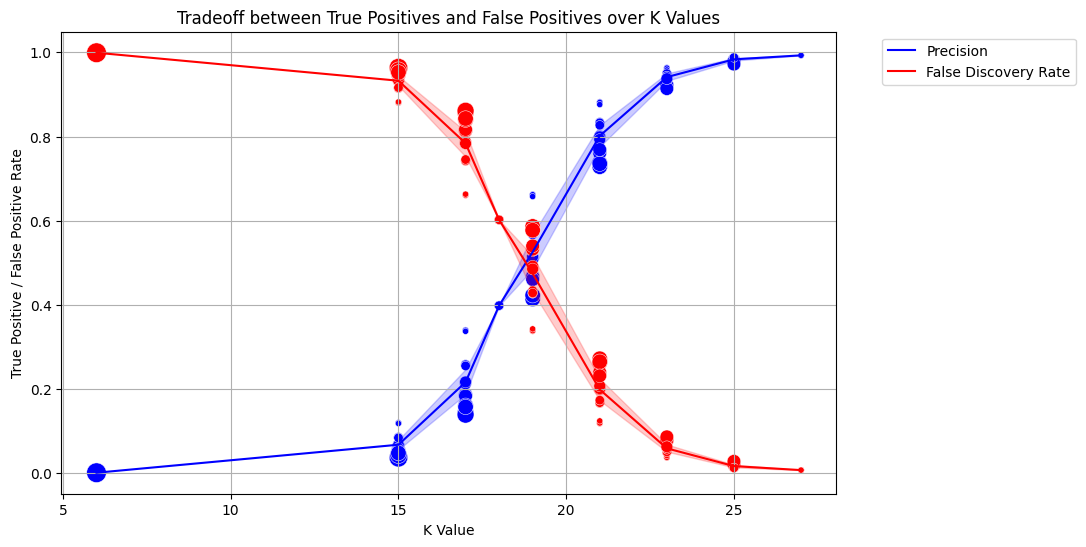

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


df["positives"] = df["true_positives"] + df["false_positives"]
df["precision"] = df["true_positives"] / df["positives"]
df["false_discovery_rate"] = df["false_positives"] / df["positives"]

# Plot the tradeoff between precision and false discovery rate with parameter k
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="k", y="precision", size="m", sizes=(20, 200), legend=None, color="blue")
sns.lineplot(data=df, x="k", y="precision", label="Precision", color="blue")
sns.scatterplot(data=df, x="k", y="false_discovery_rate", size="m", sizes=(20, 200), legend=None, color="red")
sns.lineplot(data=df, x="k", y="false_discovery_rate", label="False Discovery Rate", color="red")
plt.title("Tradeoff between True Positives and False Positives over K Values")
plt.xlabel("K Value")
plt.ylabel("True Positive / False Positive Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.savefig("../images/precision-fdr-tradeoff-k.png", bbox_inches="tight")
plt.show()

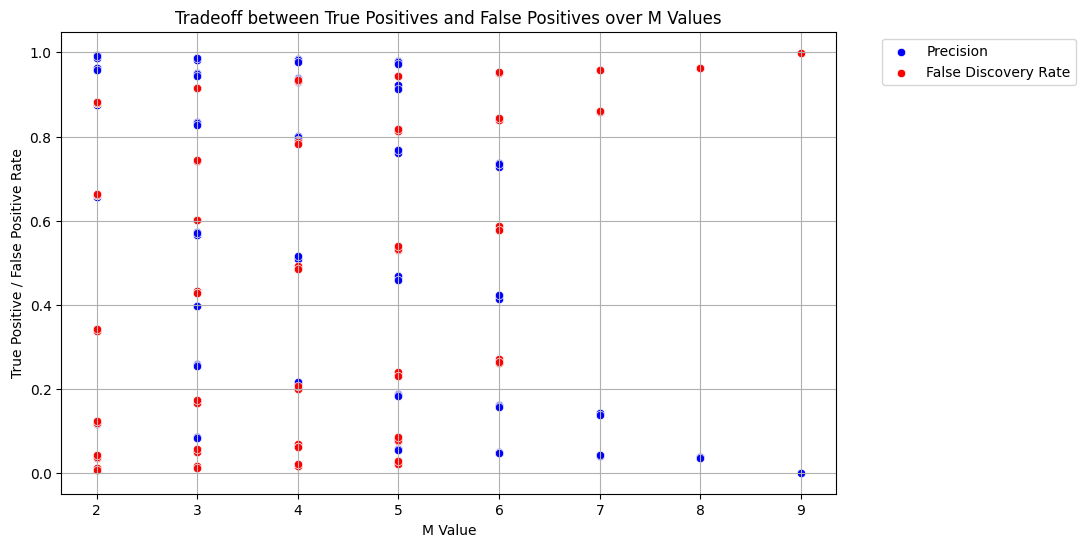

In [3]:
# Plot the tradeoff between precision and false discovery rate with parameter m
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="m", y="precision", color="blue", label="Precision")
# sns.lineplot(data=df, x="m", y="precision", label="Precision", color="blue")
sns.scatterplot(data=df, x="m", y="false_discovery_rate", color="red", label="False Discovery Rate")
# sns.lineplot(data=df, x="m", y="false_discovery_rate", label="False Discovery Rate", color="red")
plt.title("Tradeoff between True Positives and False Positives over M Values")
plt.xlabel("M Value")
plt.ylabel("True Positive / False Positive Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.savefig("../images/precision-fdr-tradeoff-m.png", bbox_inches="tight")
plt.show()

Now an interesting aspect is to analyze how the absolute true positives increase or decrease with `k` and `m`. We expect them to decrease with `k` (more complex hashes means less chances for each item to collide with others) and increase with `m` (more repetitions means more chances for objects to collide), but let's see how much.

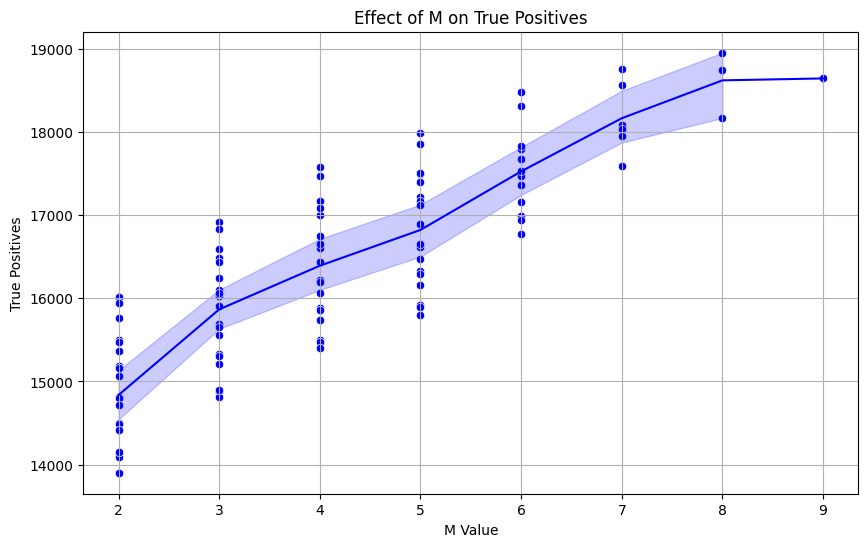

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="m", y="true_positives", color="blue")
sns.lineplot(data=df, x="m", y="true_positives", color="blue")
plt.title("Effect of M on True Positives")
plt.xlabel("M Value")
plt.ylabel("True Positives")
plt.grid(True)
plt.savefig("../images/true-positives-m.png", bbox_inches="tight")
plt.show()

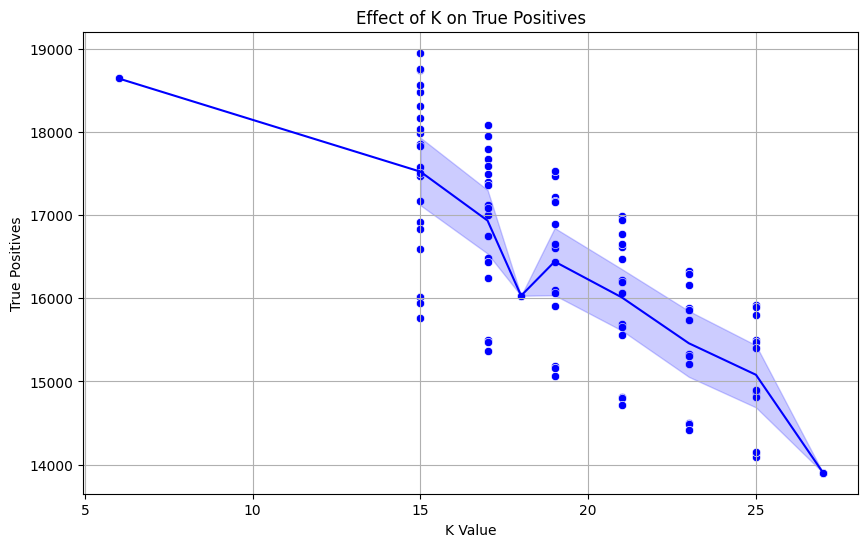

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="k", y="true_positives", color="blue")
sns.lineplot(data=df, x="k", y="true_positives", color="blue")
plt.title("Effect of K on True Positives")
plt.xlabel("K Value")
plt.ylabel("True Positives")
plt.grid(True)
plt.savefig("../images/true-positives-k.png", bbox_inches="tight")
plt.show()

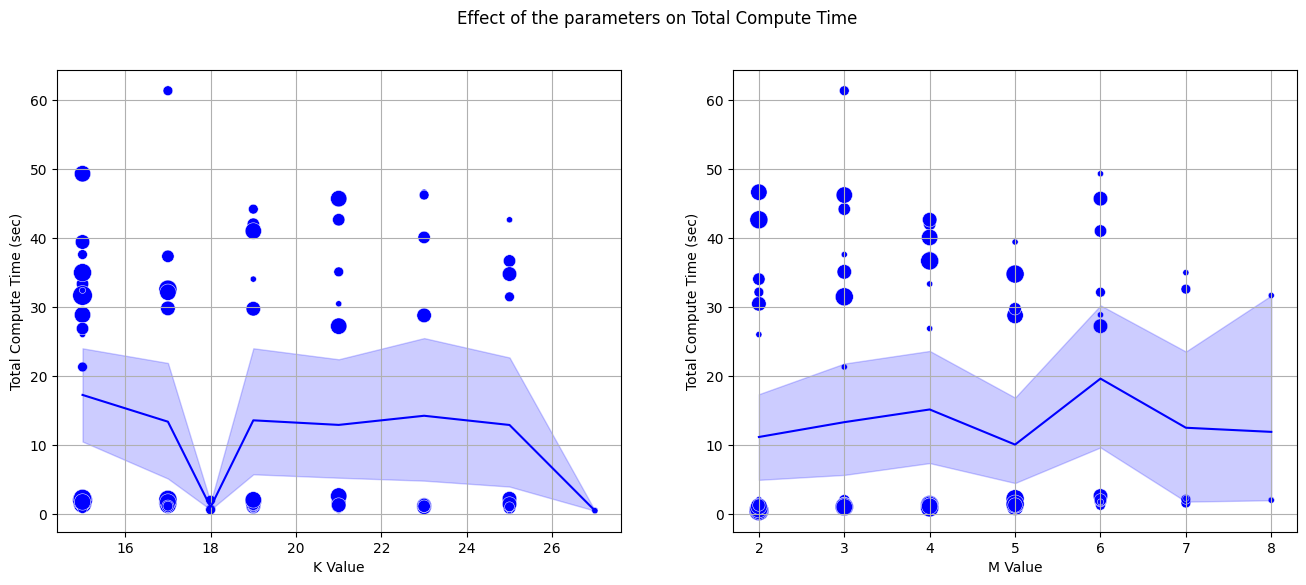

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Discard the row with k=6
df = df[df["k"] != 6]

df = df.fillna(0)
df["total_time_sec"] = df["build_time_sec"] + df["candidate_time_sec"] + df["eval_time_sec"]

# Plot the tradeoff between total compute time and the parameters
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(data=df, x="k", y="total_time_sec", size="m", sizes=(20, 200), legend=None, color="blue", ax=ax[0])
sns.lineplot(data=df, x="k", y="total_time_sec", label="Total Time (sec)", color="blue", legend=None, ax=ax[0])
ax[0].set_xlabel("K Value")
ax[0].set_ylabel("Total Compute Time (sec)")
ax[0].grid(True)

# Plot the tradeoff between total compute time and the parameters
sns.scatterplot(data=df, x="m", y="total_time_sec", size="k", sizes=(20, 200), legend=None, color="blue", ax=ax[1])
sns.lineplot(data=df, x="m", y="total_time_sec", label="Total Time (sec)", color="blue", legend=None, ax=ax[1])
ax[1].set_xlabel("M Value")
ax[1].set_ylabel("Total Compute Time (sec)")
ax[1].grid(True)

fig.suptitle("Effect of the parameters on Total Compute Time")
plt.savefig("../images/total-time.png", bbox_inches="tight")